In [1]:
from exam_functions import *
import exam_toolbox as et
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# 1

In [3]:
# 2

In [4]:
# 3

In [2]:
# 4
x = np.array([15.5, 59.2, 1.4, 1438.0, 5.3])
mu = np.array([12.9, 58.2, 1.7, 1436.8, 4.1])
V = np.array(
    [
        [0.11, -0.8, 0.3, -0.17, -0.48],
        [-0.58, -0.31, 0.01, -0.5, 0.56],
        [0.49, 0.08, -0.49, -0.72, -0.07],
        [0.6, -0.36, 0.04, 0.27, 0.66],
        [-0.23, -0.36, -0.82, 0.37, -0.09],
    ]
)
x_s = x - mu
x_s.T @ V

array([ 3.000e-03, -3.278e+00,  1.000e-03,  4.200e-02,  1.700e-02])

In [3]:
# 5
def empirical_correlation(covariance_matrix, feature_index_1, feature_index_2):
    # Calcola la varianza delle due features
    var_feature_1 = covariance_matrix[feature_index_1, feature_index_1]
    var_feature_2 = covariance_matrix[feature_index_2, feature_index_2]

    # Calcola la covarianza tra le due features
    cov_features = covariance_matrix[feature_index_1, feature_index_2]

    # Calcola la correlazione empirica
    correlation = cov_features / np.sqrt(var_feature_1 * var_feature_2)

    return correlation


emp = np.array(
    [
        [143.0, 39.0, -0.0, 253.0, 142.0],
        [39.0, 415.0, -7.0, -6727.0, 143.0],
        [-0.0, -7.0, 1.0, 108.0, -2.0],
        [253.0, -6727.0, 108.0, 370027.0, -1403.0],
        [142.0, 143.0, -2.0, -1403.0, 171.0],
    ]
)

empirical_correlation(emp, 1, 2)

-0.3436164855716712

In [4]:
# 6

data = np.array(
    [
        [0.0, 5.0, 7.7, 6.1, 4.2, 11.0, 7.3, 9.0, 11.3, 1.4],
        [5.0, 0.0, 5.4, 4.0, 7.5, 7.9, 5.3, 6.8, 11.9, 3.5],
        [7.7, 5.4, 0.0, 5.2, 7.2, 6.1, 7.8, 6.7, 12.9, 6.4],
        [6.1, 4.0, 5.2, 0.0, 5.1, 5.4, 8.4, 3.3, 8.1, 4.8],
        [4.2, 7.5, 7.2, 5.1, 0.0, 8.7, 8.8, 6.6, 7.7, 4.1],
        [11.0, 7.9, 6.1, 5.4, 8.7, 0.0, 12.0, 4.2, 9.3, 9.8],
        [7.3, 5.3, 7.8, 8.4, 8.8, 12.0, 0.0, 11.0, 16.3, 6.7],
        [9.0, 6.8, 6.7, 3.3, 6.6, 4.2, 11.0, 0.0, 6.2, 7.8],
        [11.3, 11.9, 12.9, 8.1, 7.7, 9.3, 16.3, 6.2, 0.0, 10.4],
        [1.4, 3.5, 6.4, 4.8, 4.1, 9.8, 6.7, 7.8, 10.4, 0.0],
    ]
)

df = pd.DataFrame(data)

ARD(df, 2, 2)

The density for observation O3 is 0.18867924528301885
The average relative density for observation O3 is 0.6979857215706273


0.6979857215706273

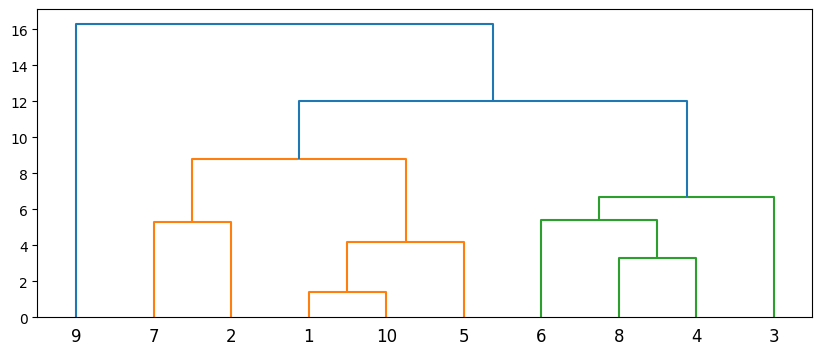

In [10]:
# 7
draw_dendrogram_df(df, method="complete")

In [9]:
# 8

In [10]:
# 9

In [11]:
# 10

In [12]:
# 11

In [13]:
# 12

In [15]:
# 13

In [7]:
def calculate_rss(values):
    return np.sum((values - np.mean(values)) ** 2)


## TO USE FOR REGRESSION TREES
def purity_gain_rss(parent_values, left_child_values, right_child_values):
    """
    Calculates the purity gain using RSS (Residual Sum of Squares) for a given split.

    Parameters:
    - parent_values (numpy.ndarray): Values of the parent node before the split.
    - left_child_values (numpy.ndarray): Values of the left child node after the split.
    - right_child_values (numpy.ndarray): Values of the right child node after the split.

    Returns:
    - float: Purity gain using RSS.
    """

    rss_parent = calculate_rss(parent_values)
    rss_left_child = calculate_rss(left_child_values)
    rss_right_child = calculate_rss(right_child_values)
    total_instances = len(parent_values)
    total_instances_left = len(left_child_values)
    total_instances_right = len(right_child_values)

    i_p = (1 / total_instances) * rss_parent
    i_l = (1 / total_instances_left) * rss_left_child
    i_r = (1 / total_instances_right) * rss_right_child

    print(f"Impurity PARENT      : {i_p}")
    print(f"Impurity LEFT CHILD  : {i_l}")
    print(f"Impurity RIGHT CHIKD : {i_r}")

    # Calculate the purity gain using RSS

    purity_gain = (
        i_p
        - (total_instances_left / total_instances) * i_l
        - (total_instances_right / total_instances) * i_r
    )

    return purity_gain

In [8]:
# 14
purity_gain_rss([23, 6, 17, 14, 13], [23], [6, 17, 14, 13])

Impurity PARENT      : 30.64
Impurity LEFT CHILD  : 0.0
Impurity RIGHT CHIKD : 16.25


17.638

In [17]:
# 15

In [18]:
# 16

In [14]:
ann = et.ann()

# w02 : the w02 given in the xercise
# weights : list of the weights which have superscript (2)
# matrices : the matrices, usually w_n^(1)
ann = ann.get_ann(1.4, [-1, 0.4], [[-0.5, -0.1], [0.9, 2]], "logistic")
y = ann([1, 1])

print(1 / (1 + np.e ** (-y)))

[[0.806089]]


In [35]:
# 17
def kde(x_train, x_test, sigma):
    """Compute the kernel density estimation
    given the vector of training and the test
    is a value for getting the predicition

    Args:
        x_train (list): training values
        x_test (double): test val
        sigma (double): kernel width

    Returns:
        double: p
    """
    N = len(x_train)
    p_ = 0
    for x in x_train:
        p_ += (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(
            -(((x_test - x) ** 2) / (2 * sigma**2))
        )
    p = (1 / N) * p_

    return p

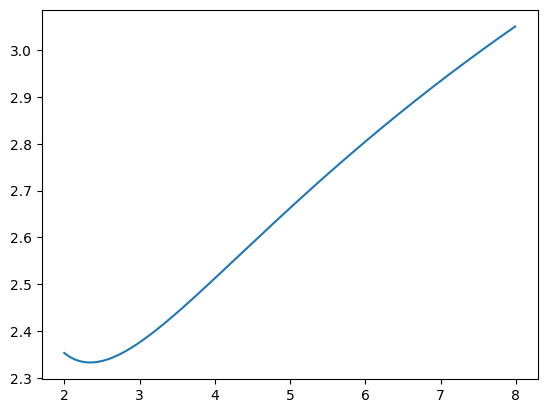

In [36]:
yval = []
xval = []
xtest = 1.2
xtrain = [4.5, -0.5]
for sigma in np.arange(2, 8, 0.01):
    xval.append(sigma)
    p = kde(xtrain, xtest, sigma)
    yval.append(-np.log(p))

plt.plot(xval, yval)

In [20]:
# 18

In [21]:
# 19

In [22]:
# 20

In [23]:
# 21

In [24]:
# 22

In [25]:
# 23

In [26]:
# 24

In [27]:
# 25

In [28]:
# 26

In [29]:
# 27